In [1]:
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint
import pprint 
from config1 import w_key
from citipy import citipy

*We need a list of cities to gather weather data. We will now generate a list of cities and then create a dataframe of the cities, and also export the cities to a CSV file.*

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
duplicated = []
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
i = 1
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
   # print(f"record {i}", {lat_lng[0], lat_lng[1]}, {city})
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
    else:
        duplicated.append(city)
    i = i+1
print('\n')
print(f"Duplicated cities = {duplicated}")
print('\n')
# Print the city count to confirm sufficient count
print('\n')
print(f"Cities that will be used for analysis = {cities}")
print('\n')
print(f" Leaving behind the duplicated cities, the count of cities =  {len(cities)}")



Duplicated cities = ['bethel', 'ushuaia', 'lagoa', 'punta arenas', 'ushuaia', 'punta arenas', 'bethel', 'lebu', 'ushuaia', 'punta arenas', 'albany', 'albany', 'ushuaia', 'punta arenas', 'albany', 'bethel', 'jamestown', 'rikitea', 'ushuaia', 'busselton', 'hilo', 'rikitea', 'busselton', 'atuona', 'cidreira', 'rikitea', 'lebu', 'albany', 'puerto ayora', 'kapaa', 'ushuaia', 'busselton', 'kavieng', 'jamestown', 'kapaa', 'dikson', 'mar del plata', 'mataura', 'busselton', 'atuona', 'barentsburg', 'rikitea', 'ushuaia', 'hilo', 'port alfred', 'lebu', 'taolanaro', 'atuona', 'punta arenas', 'tuktoyaktuk', 'avarua', 'hilo', 'lebu', 'hermanus', 'georgetown', 'castro', 'muros', 'dikson', 'barrow', 'busselton', 'vaini', 'hermanus', 'puerto ayora', 'illoqqortoormiut', 'albany', 'ushuaia', 'avarua', 'yellowknife', 'mataura', 'cape town', 'yellowknife', 'castro', 'saleaula', 'clyde river', 'qaanaaq', 'vaini', 'ushuaia', 'rikitea', 'avarua', 'lavrentiya', 'hermanus', 'rikitea', 'taolanaro', 'georgetown

*Creating a Dataframe of the generated Cities:*

In [3]:
cities_df = pd.DataFrame({'Cities' : cities})
cities_df.head()

,Cities
0,purranque
1,mount gambier
2,aksarka
3,huazolotitlan
4,rochegda


*Writing cities to csv:*

In [7]:
cities_df.to_csv(r"Cities.csv", index=False, header=True)
print("File write successful")                       

File write successful


*Defining the required functions to update metrics*

In [8]:
def kelvin_to_farenheit(temps):
    """Converts a Kelvin temperature to Fahrenheit"""
    return temps * 9/5 - 459.67

def mps_to_mph(windSpeed):
    """Converts a meters/s speed to miles/hour"""
    return windSpeed * 2.23694

*Performing API Calls using each city in the openweather API url get the weather data*

In [9]:
base_url = "http://api.openweathermap.org/data/2.5/weather?q="
#Obtain weathercheck data for the cities from openweather map: 

city_name = cities
row = []
city_row = []
for i in range(len(city_name)):
#for i in range(10):
    print(f"Processing request for index number: {i} which is for City: {city_name[i]}")
    url = base_url + city_name[i] + "&appid=" + w_key
    print(url)
    response = requests.get(url)
    city_json = response.json()
    #print(city_json)
    print(response.status_code)
    if response.status_code == 200:
        try:
            city_cntry = (city_json['sys']['country'])
            #print(city_cntry)
            city_lat = (city_json['coord']['lat'])
            #print(city_lat)
            city_lon = (city_json['coord']['lon']) 
           # print(city_lon)
            city_temp = kelvin_to_farenheit(city_json['main']['temp'])
           # print(city_temp)
            city_humidity = (city_json['main']['humidity'])
            #print(city_humidity)
            city_cloudiness = (city_json['clouds']['all'])
           # print(city_cloudiness)
            city_windSpeed = mps_to_mph(city_json['wind']['speed'])
           # print(city_windSpeed)
            row = [city_name[i], city_cntry, city_lat, city_lon, city_temp, city_humidity, city_cloudiness, city_windSpeed]
           # print(row)
            city_row.append(row)
            #print(city_row)
        except:
            print(f"I skipped {cities[i]} because something isn't right")

city_df = pd.DataFrame(city_row)   
city_df.columns = ['City', 'Country', 'Lat', 'Lon', 'Temp', 'Humidity', 'Cloudiness', 'Windspeed']

city_df.head()

Processing request for index number: 0 which is for City: purranque
http://api.openweathermap.org/data/2.5/weather?q=purranque&appid=397b95f1b822905242cabd4b62006f61
200
Processing request for index number: 1 which is for City: mount gambier
http://api.openweathermap.org/data/2.5/weather?q=mount gambier&appid=397b95f1b822905242cabd4b62006f61
200
Processing request for index number: 2 which is for City: aksarka
http://api.openweathermap.org/data/2.5/weather?q=aksarka&appid=397b95f1b822905242cabd4b62006f61
200
Processing request for index number: 3 which is for City: huazolotitlan
http://api.openweathermap.org/data/2.5/weather?q=huazolotitlan&appid=397b95f1b822905242cabd4b62006f61
404
Processing request for index number: 4 which is for City: rochegda
http://api.openweathermap.org/data/2.5/weather?q=rochegda&appid=397b95f1b822905242cabd4b62006f61
200
Processing request for index number: 5 which is for City: bambous virieux
http://api.openweathermap.org/data/2.5/weather?q=bambous virieux&a

,City,Country,Lat,Lon,Temp,Humidity,Cloudiness,Windspeed
0,purranque,CL,-40.92,-73.17,39.200,86,0,5.816044
1,mount gambier,AU,-37.83,140.77,60.800,67,90,12.750558
2,aksarka,RU,66.56,67.80,19.760,98,99,8.947760
3,rochegda,RU,62.80,43.25,24.584,99,72,4.764682
4,bambous virieux,MU,-20.34,57.76,77.486,69,75,12.750558


*Create a DataFrame of the weathercheck data*

In [10]:
weather_check_df = pd.DataFrame({ "City" : city_df['City'],
                                  "Latitude" : city_df['Lat'],
                                  "Longitude" : city_df['Lon'],
                                  "Temperature(F)" : city_df['Temp'],
                                  "Humidity%" : city_df['Humidity'],
                                  "Cloudiness%" : city_df['Cloudiness'],
                                  "Wind Speed(mph)" : city_df['Windspeed'] })                                                         

weather_check_df.head()

,City,Latitude,Longitude,Temperature(F),Humidity%,Cloudiness%,Wind Speed(mph)
0,purranque,-40.92,-73.17,39.200,86,0,5.816044
1,mount gambier,-37.83,140.77,60.800,67,90,12.750558
2,aksarka,66.56,67.80,19.760,98,99,8.947760
3,rochegda,62.80,43.25,24.584,99,72,4.764682
4,bambous virieux,-20.34,57.76,77.486,69,75,12.750558


*Definining a function called 'scatter_plot' for plotting the visualization*

In [11]:
def scatter_plot(x_values,y_values,x_label,y_label,title,regress):
    plt.scatter(x_values,y_values,marker="o", facecolors="red", edgecolors="black",s=30, alpha=0.75)
    if regress==True:
        (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        r_sq = "r-sq="+str(round(rvalue,2))
        plt.plot(x_values,regress_values,"r-")
        
        x_location=round(np.percentile(x_values,50),0)
        y_location=round(np.percentile(regress_values,50),0)
               
        plt.annotate(line_eq, (x_location,y_location), fontsize=12,color="green")
        plt.annotate(r_sq, (x_location,y_location-10), fontsize=12,color="green")
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)   

*Definining a function called 'save_image'*

In [19]:
def save_image(x_values,y_values,x_label,y_label,title, regress):
    scatter_plot(x_values,y_values,x_label,y_label,title,regress)
    plt.savefig(f"{title}.png")
    plt.show()

Plotting & saving the scatter chart of Temperature(F) vs. Latitude


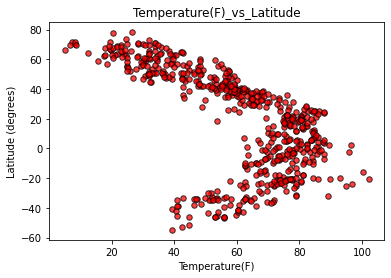

Plotting & saving the scatter chart of Humidity% vs. Latitude


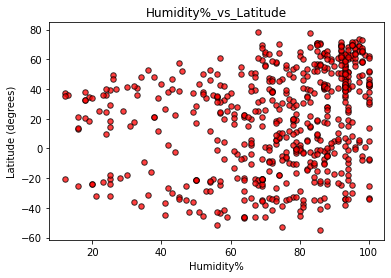

Plotting & saving the scatter chart of Cloudiness% vs. Latitude


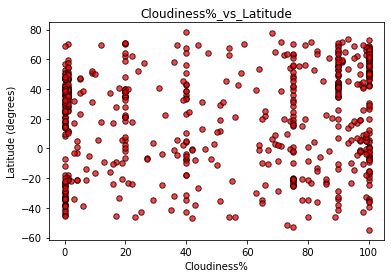

Plotting & saving the scatter chart of Wind Speed(mph) vs. Latitude


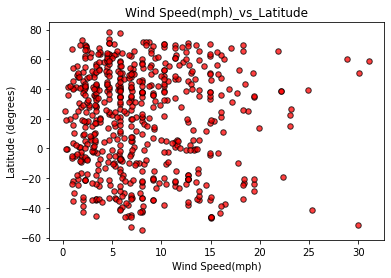

In [20]:
#Defining a list of weather data to be x - values & regions for plotting latitude vs weather data
weather_info = ['Temperature(F)', 'Humidity%', 'Cloudiness%', 'Wind Speed(mph)']
regress=False
for info in weather_info:
    print(f"Plotting & saving the scatter chart of {info} vs. Latitude")
    x_values = weather_check_df[info]
    y_values = weather_check_df['Latitude']
    x_label = info
    y_label = "Latitude (degrees)"
    title = f"{info}_vs_Latitude"
    save_image(x_values,y_values,x_label,y_label,title,regress)    

Plotting & saving the scatter chart of Northern_Hemisphere - Temperature(F) vs. Latitude


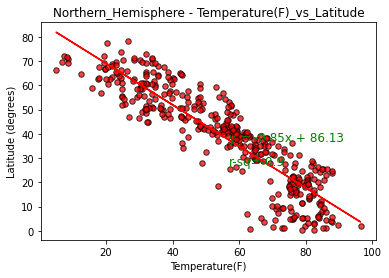

Plotting & saving the scatter chart of Northern_Hemisphere - Humidity% vs. Latitude


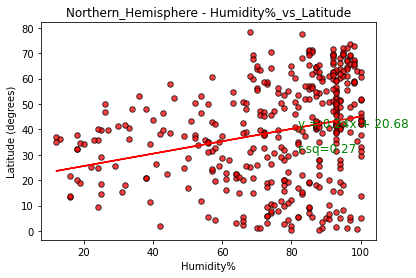

Plotting & saving the scatter chart of Northern_Hemisphere - Cloudiness% vs. Latitude


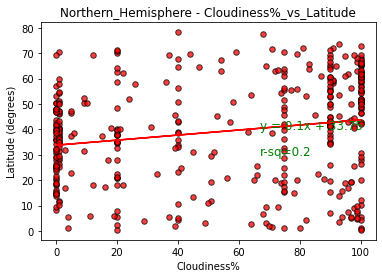

Plotting & saving the scatter chart of Northern_Hemisphere - Wind Speed(mph) vs. Latitude


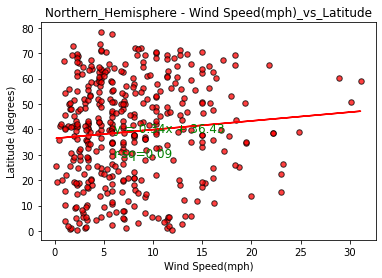

Plotting & saving the scatter chart of Southern_Hemisphere - Temperature(F) vs. Latitude


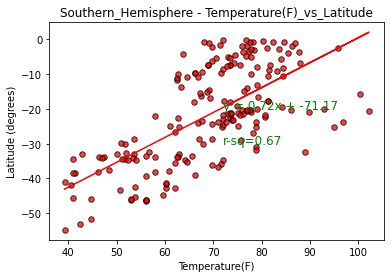

Plotting & saving the scatter chart of Southern_Hemisphere - Humidity% vs. Latitude


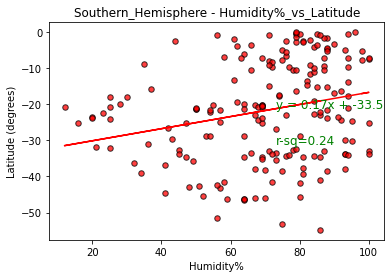

Plotting & saving the scatter chart of Southern_Hemisphere - Cloudiness% vs. Latitude


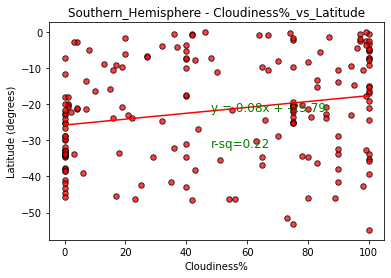

Plotting & saving the scatter chart of Southern_Hemisphere - Wind Speed(mph) vs. Latitude


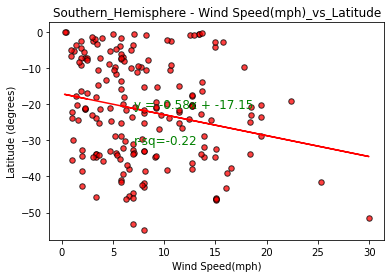

In [21]:
# We need northern_hemisphere_weather_df and southern_hemisphere_weather_df out of weather_check_df
northern_hemisphere_weather_df = weather_check_df[weather_check_df['Latitude'] >= 0]
southern_hemisphere_weather_df = weather_check_df[weather_check_df['Latitude'] < 0]

#This block will call the function scatter_plot and provide parameters as defined below
regions = ['Northern_Hemisphere','Southern_Hemisphere']
#Defining a list of weather data to be x - values & regions for plotting
weather_info = ['Temperature(F)', 'Humidity%', 'Cloudiness%', 'Wind Speed(mph)']
#print overall parameters vs latitude without regression
regress=True
for region in regions:
    for info in weather_info:
        if region == 'Northern_Hemisphere':
            print(f"Plotting & saving the scatter chart of {region} - {info} vs. Latitude")
            weather_data_df = northern_hemisphere_weather_df
        elif region == 'Southern_Hemisphere':
            print(f"Plotting & saving the scatter chart of {region} - {info} vs. Latitude")
            weather_data_df = southern_hemisphere_weather_df  
        x_values = weather_data_df[info]
        y_values = weather_data_df['Latitude']
        x_label = info
        y_label = "Latitude (degrees)"
        title = f"{region} - {info}_vs_Latitude"
        save_image(x_values,y_values,x_label,y_label,title,regress)

'''
Inferences from the Graphs:
Temperature has strong correlation the latitude of a city. 
There is strong positive correlation in Southern hemisphere(when the latitude increases, the temperature also increases and vice versa),
and strong negative correlation(as latitude increases, temperature decreases and vice versa) in the Northern hemisphere. 

There is no indication of any correlation between humidity OR cloudiness with the latitude of a city.

Also, there is no significant correlation between wind speed and latitude, but wind speed
appears to be a constant in the cities belonging in the northern hemisphere.
'''